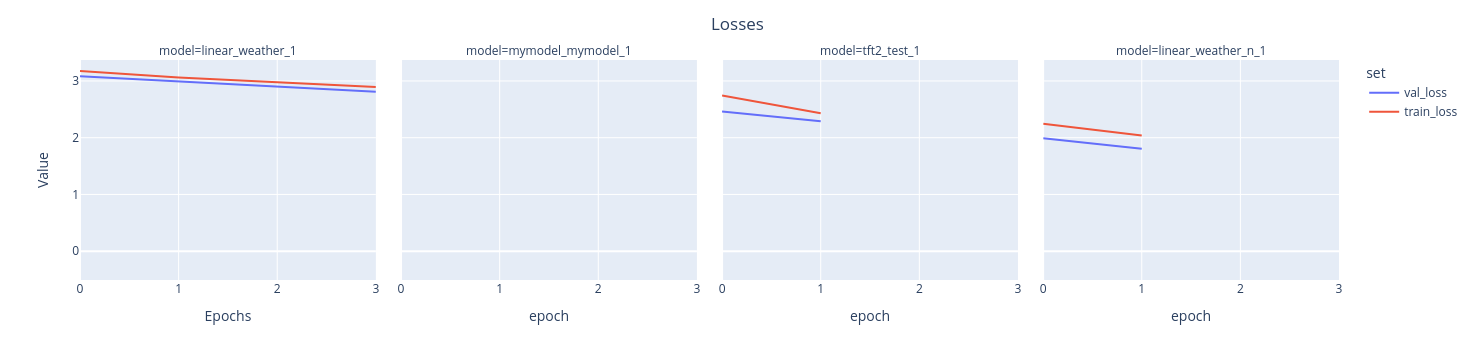

In [3]:
import plotly.express as px
import pandas as pd
import numpy as np
##Check the losses trend
tot_losses = pd.read_csv('/home/agobbi/Projects/ExpTS/test/csv/prova_test_LOSSES.csv')
fig_losses = px.line(tot_losses,x = 'epoch',y='loss',color = 'set',facet_col='model',width = 2600)
fig_losses.update_layout(title = {'text':f'Losses', 'x':0.5},
                  xaxis_title={'text':'Epochs'},
                  yaxis_title={'text':'Value'},

                    )
    
fig_losses

In [3]:
tot_pred = pd.read_csv('/home/agobbi/Projects/ExpTS/test/csv/prova_test_tot_predictions.csv')
tot_pred.sort_values(by='time',inplace=True)


In [14]:
tot_pred = pd.read_csv('/home/agobbi/Projects/ExpTS/pollen/csv/prova_test_tot_predictions.csv')
tot_pred.sort_values(by='time',inplace=True)


In [21]:
tot_pred.head()

Unnamed: 0  lag        time  region        totals  totals_pred  \
13311       13311    1  2001-04-15    Kevo  8.719308e-08     3.508963   
13312       13312    1  2001-04-16    Kevo  8.719308e-08     3.923813   
61985       61985    2  2001-04-16  Geneva  8.719308e-08     2.537340   
13313       13313    1  2001-04-17    Kevo  8.719308e-08     3.916022   
61986       61986    2  2001-04-17  Geneva  8.719308e-08     2.695206   

            model  
13311  linear_l_1  
13312  linear_l_1  
61985  linear_l_1  
13313  linear_l_1  
61986  linear_l_1

In [25]:
tot_pred.groupby(['region','lag']).count()

Unnamed: 0   time  totals  totals_pred  model
region        lag                                               
Amiens        5         27994  27994   27994        27994  27994
              6         11248  11248   11248        11248  11248
Bahia_Blanca  13        25186  25186   25186        25186  25186
Brisbane      8         29816  29816   29816        29816  29816
              9          3028   3028    3028         3028   3028
Brussels      3          7856   7856    7856         7856   7856
              4         40332  40332   40332        40332  40332
Bursa         12        23962  23962   23962        23962  23962
              13         1224   1224    1224         1224   1224
Busan         11          474    474     474          474    474
              12        24712  24712   24712        24712  24712
Cape_Town     4          8342   8342    8342         8342   8342
              5         20680  20680   20680        20680  20680
Caxias_do_Sul 14         9842   9842    9842         9842   9842
Fairbanks     13        22264  22264   22264        22264  22264
              14         2922   2922    2922         2922   2922
Geneva        1          3048   3048    3048         3048   3048
              2         43866  43866   43866        43866  43866
Kevo          1         45626  45626   45626        45626  45626
Krakow        10         3446   3446    3446         3446   3446
              11        23014  23014   23014        23014  23014
Legnano       9         12802  12802   12802        12802  12802
              10        14932  14932   14932        14932  14932
Mexico_City   14        14952  14952   14952        14952  14952
Minneapolis   7         15274  15274   15274        15274  15274
              8         18858  18858   18858        18858  18858
Moscow        9         32844  32844   32844        32844  32844
Reykjavik     7         32858  32858   32858        32858  32858
Santiago      14         6006   6006    6006         6006   6006
Seoul         11        25186  25186   25186        25186  25186
Sydney        14        14952  14952   14952        14952  14952
Thessaloniki  6         37426  37426   37426        37426  37426
              7           542    542     542          542    542
Tulsa         10        30296  30296   30296        30296  30296
Turku         2          4808   4808    4808         4808   4808
              3         40818  40818   40818        40818  40818

In [16]:
##some models does not give you the quantiles so, for seek of comparison, you can do this workaroud
tot_pred.y_pred[np.isnan(tot_pred.y_pred)] = tot_pred.y_median[np.isnan(tot_pred.y_pred)] 

AttributeError: 'DataFrame' object has no attribute 'y_median'

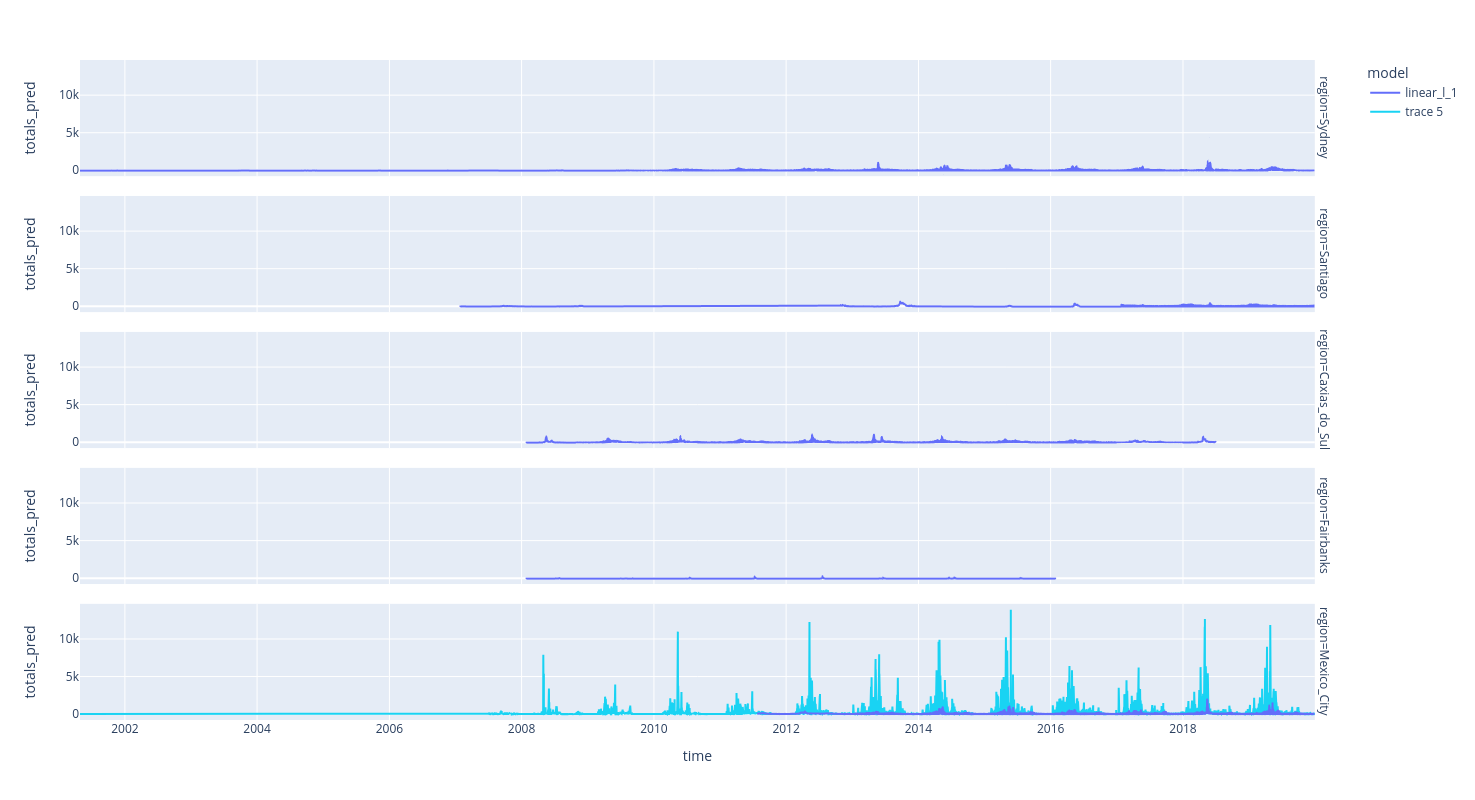

In [24]:
##let see how the prediction at step 10 are
lag=14

fig = px.line(tot_pred[(tot_pred.lag==lag)], x='time', y='totals_pred', color='model',height=800,facet_row='region')
fig.add_scatter(x = tot_pred[tot_pred.lag==lag].time, y=tot_pred[tot_pred.lag==lag].totals)

In [8]:
##let see how the prediction at step 10 are
lag=10

fig = px.line(tot_pred[(tot_pred.lag==lag)], x='time', y='y_median', color='model',height=800)
fig.add_scatter(x = tot_pred[tot_pred.lag==lag].time, y=tot_pred[tot_pred.lag==lag].y)


ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['Unnamed: 0', 'lag', 'time', 'region', 'totals', 'totals_pred', 'model'] but received: y_median

In [16]:
import numpy as np
error = tot_pred.groupby(['lag','model']).apply(lambda x: np.nanmean((x.y-x.y_pred)**2)).reset_index().rename(columns={0:'error'}) 


In [7]:
import numpy as np
error = tot_pred.groupby(['lag','model']).apply(lambda x: 100*np.nanmean(np.abs(x.y-x.y_median)/x.y)).reset_index().rename(columns={0:'error'}) 


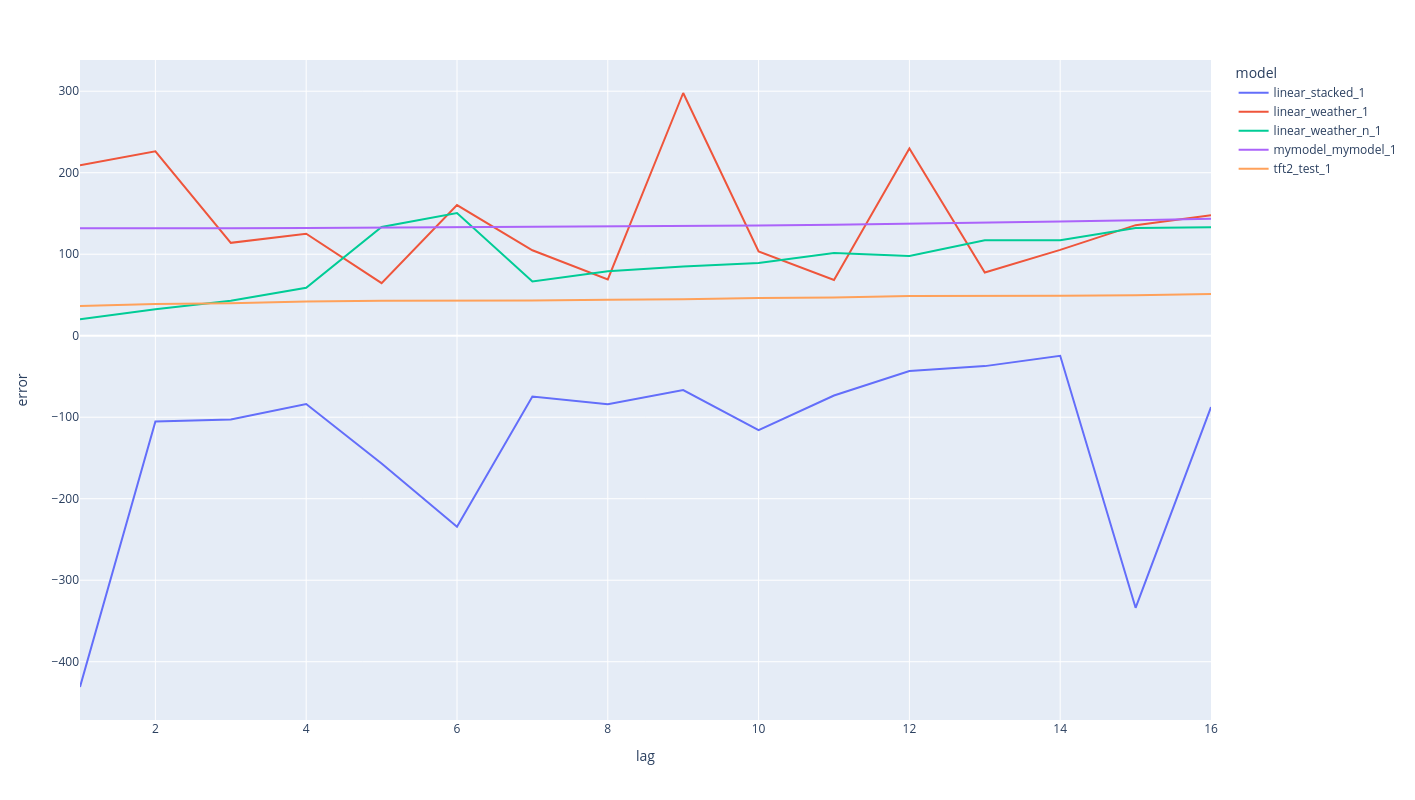

In [8]:
fig = px.line(error, x='lag', y='error', color='model',height=800)
fig.show()